<a href="https://colab.research.google.com/github/Lauriano-Viana/fase-06-t-01-yolov5/blob/main/LaurianoCostaViana_rm559475_pbl_fase6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento e Validação do Modelo YOLO

### Montagem do Google Drive - Para acessar os datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Clone do repositório YOLOv5 - Instalação da arquitetura

In [ ]:
! git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17395, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 17395 (delta 57), reused 20 (delta 20), pack-reused 17320 (from 3)
Receiving objects: 100% (17395/17395), 16.25 MiB | 20.10 MiB/s, done.
Resolving deltas: 100% (11920/11920), done.


### Instalação de dependências - Preparação do ambiente

In [ ]:
! pip install -r yolov5/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 56.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

### Treinamento do modelo - Com hiperparâmetros configuráveis

In [ ]:
!python yolov5/train.py --data /content/drive/MyDrive/fase-06-tarefa-01/assets/agro.yaml --weights yolov5s.pt --img 640 --epochs 45

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-17 14:25:16.291279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744899916.312233   20509 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744899916.319142   20509 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: Y

# Teste do Modelo
### Detecção em imagens de teste - Validação do modelo treinado

In [ ]:
import os
import subprocess

def get_latest_train_run_folder():
    subfolders = [f.path for f in os.scandir('yolov5/runs/train') if f.is_dir()]
    latest_folder = max(subfolders, key=os.path.getctime, default=None)
    return latest_folder

latest_run = get_latest_train_run_folder()
result = subprocess.run(f'python yolov5/detect.py --weights  {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/fase-06-tarefa-01/assets/test --data yolov5/data/agro.yaml', shell=True, capture_output=True, text=True)
if latest_run:
    # COMANDO
    result = subprocess.run(f'python yolov5/detect.py --weights {latest_run}/weights/best.pt --img 640 --source /content/drive/MyDrive/fase-06-tarefa-01/assets/test --data yolov5/data/agro.yaml', shell=True, capture_output=True, text=True)
    print(result.stdout)
    print(result.stderr)
else:
    print("Não foi possível encontrar a pasta de treinamento mais recente.")


detect: weights=['yolov5/runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/fase-06-tarefa-01/assets/test, data=yolov5/data/agro.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-413-gf2f86eb3 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/drive/MyDrive/fase-06-tarefa-01/assets/test/cobra-t1.jpeg: 384x640 1 Cobra, 27.8ms
image 2/8 /content/drive/MyDrive/fase-06-tarefa-01/assets/test/cobra-t2.jpeg: 480x640 1 Cobra, 28.4ms
image 3/8 /content/drive/MyDrive/fase-06-tarefa-01/assets

# Conclusões a respeito do modelo

## 1. Introdução
Comparamos o desempenho de três modelos YOLOv5 treinados com 30, 45 e 60 épocas, analisando métricas como precisão (P), recall (R), mAP50 e mAP50-95, além do tempo de treinamento.

## 2. Comparação Geral das Métricas
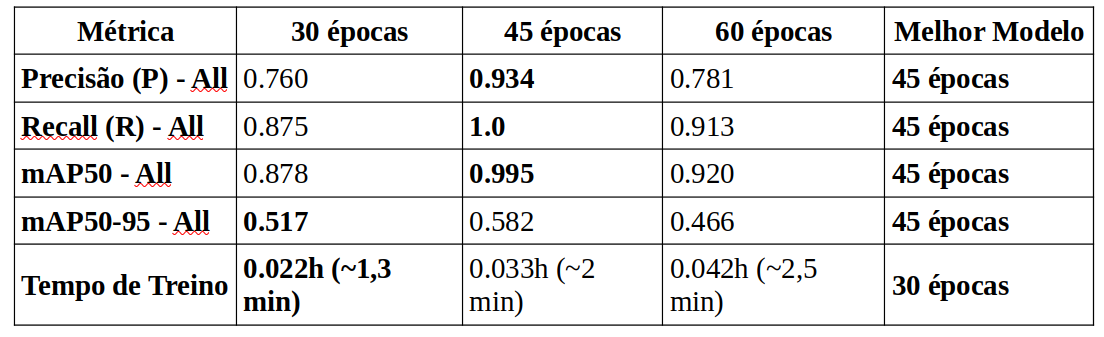



## Análise por Classe

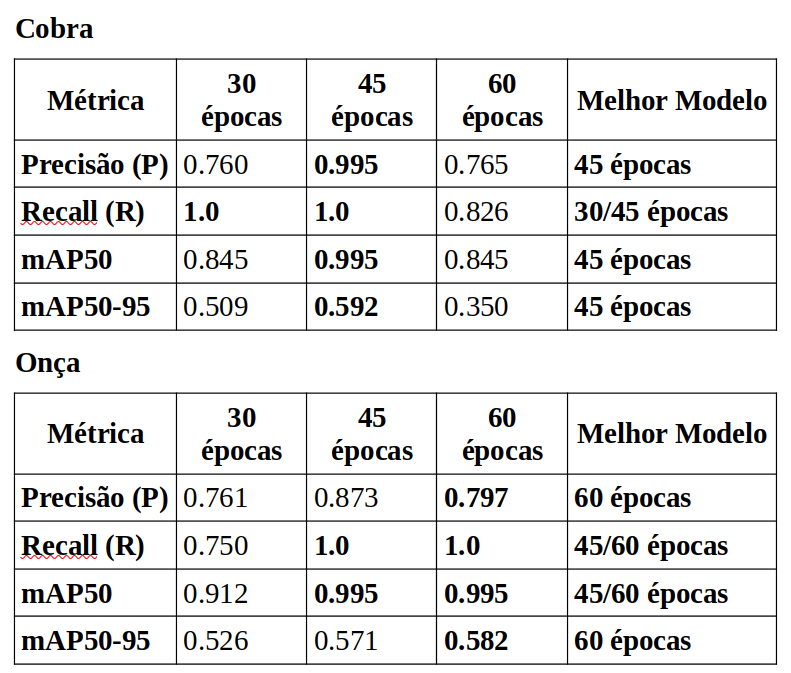

## 3. Conclusões e Recomendações

### Desempenho Geral
    • O modelo de 45 épocas teve o melhor desempenho geral, alcançando:
        ◦ Precisão (P) = 0.934 (vs. 0.760 em 30 épocas e 0.781 em 60 épocas).
        ◦ Recall (R) = 100% (detectou todas as instâncias corretamente).
        ◦ mAP50 = 0.995 (quase perfeito, superior aos outros modelos).
        ◦ mAP50-95 = 0.582 (melhor que 60 épocas e competitivo com 30 épocas).    

### Análise por Classe
    • Para "Cobra", o modelo de 45 épocas foi claramente superior, com precisão quase perfeita (0.995) e recall de 100%, além do melhor mAP50-95 (0.592).
    • Para "Onça", o modelo de 45 épocas também teve recall perfeito (100%) e mAP50 de 0.995, competindo diretamente com o de 60 épocas.

## Tempo de Treinamento
    • 30 épocas: Mais rápido (~1,3 min), mas pior desempenho.
    • 45 épocas: Equilíbrio ideal (~2 min), com o melhor desempenho.
    • 60 épocas: Mais lento (~2,5 min), sem vantagens claras sobre 45 épocas.

## Recomendação Final
✅ O modelo de 45 épocas é o mais recomendado, pois:

    • Teve o melhor desempenho geral.
    • Apresentou recall perfeito (100%) e mAP50 quase ideal (0.995).
    • Manteve um tempo de treinamento razoável (apenas ~0,5 min a mais que 30 épocas).

### Imagens de test modelo 45 epocas

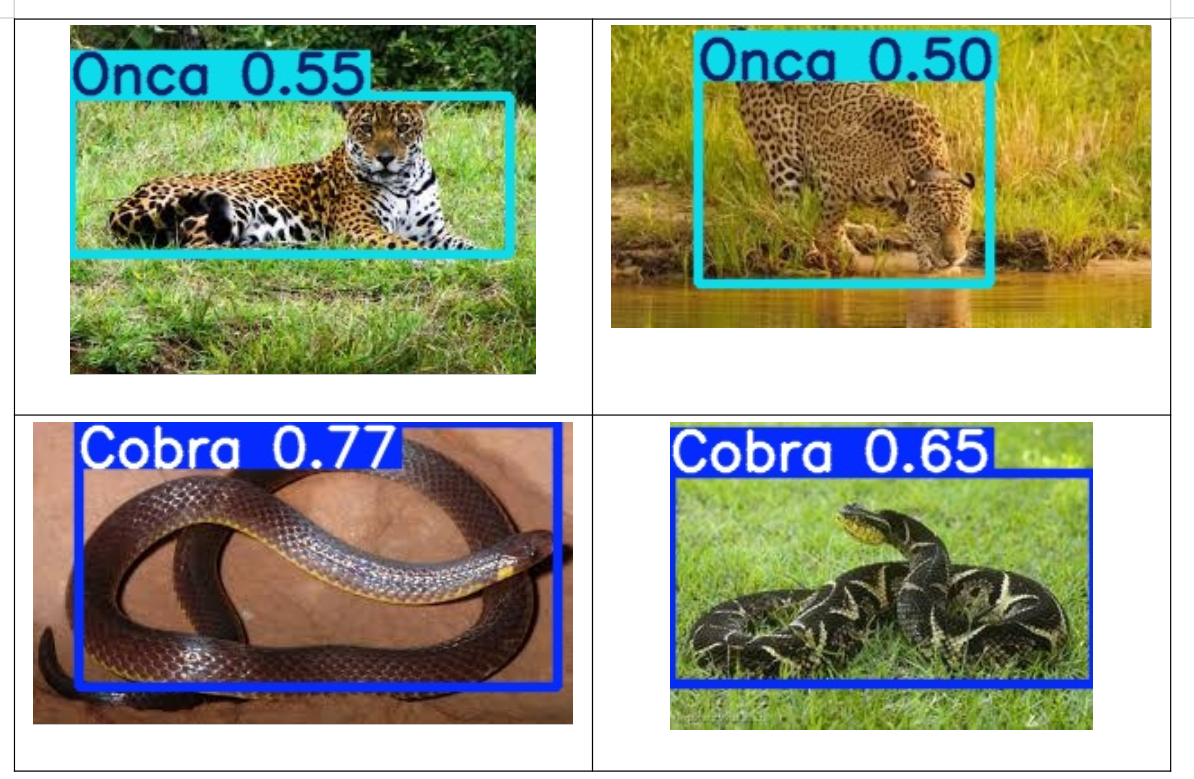